## Product Subscription Project

### Import des packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px

# lib pour visualiser les données manquantes
import missingno as msno

# Changer la taille par défaut des graphiques
rcParams['figure.figsize'] = 15,10

### Import des données

In [3]:
df = pd.read_csv('../data/data.csv', sep=";")

In [39]:
df

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,2010-10-27,47,Manager,Marié,Tertiaire,No,0,No,No,Portable,508,1,-1,0,NaN,Yes
45132,2010-10-27,61,Retraité,Marié,Secondaire,No,1058,No,No,Portable,277,1,92,5,Succes,No
45133,2010-10-27,24,Etudiant,Célibataire,Secondaire,No,822,No,No,Portable,184,1,91,2,Echec,Yes
45134,2010-10-27,70,Retraité,Marié,Secondaire,No,0,No,No,Portable,258,1,92,5,Succes,Yes


#### Description des données

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      45136 non-null  object
 1   AGE                       45136 non-null  int64 
 2   JOB_TYPE                  44850 non-null  object
 3   STATUS                    44008 non-null  object
 4   EDUCATION                 43283 non-null  object
 5   HAS_DEFAULT               45136 non-null  object
 6   BALANCE                   45136 non-null  int64 
 7   HAS_HOUSING_LOAN          45136 non-null  object
 8   HAS_PERSO_LOAN            43782 non-null  object
 9   CONTACT                   32117 non-null  object
 10  DURATION_CONTACT          45136 non-null  int64 
 11  NB_CONTACT                45136 non-null  int64 
 12  NB_DAY_LAST_CONTACT       45136 non-null  int64 
 13  NB_CONTACT_LAST_CAMPAIGN  45136 non-null  int64 
 14  RESULT_LAST_CAMPAIGN  

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


<AxesSubplot:>

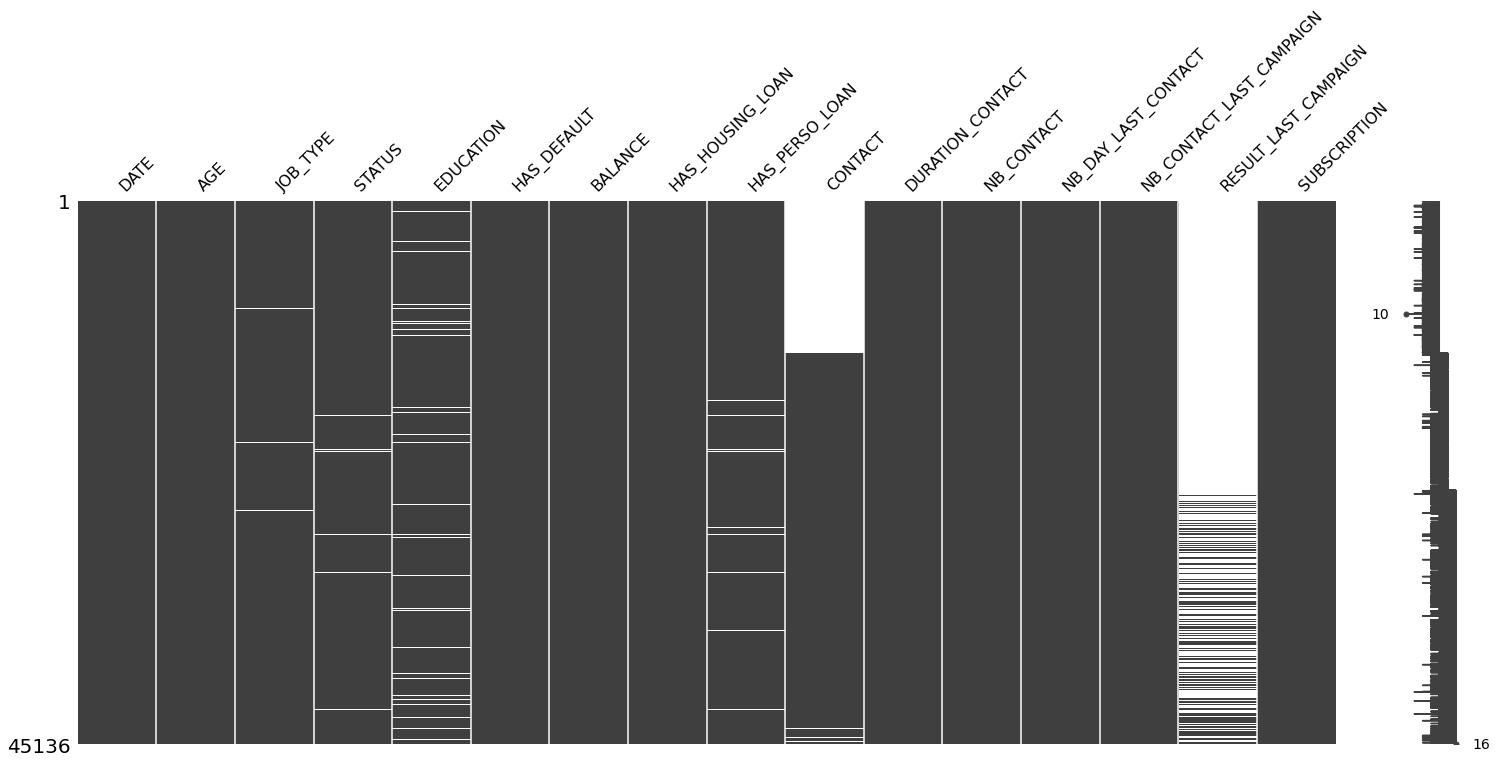

In [12]:
msno.matrix(df)

## Gestion des données manquantes

In [13]:
def get_missing_percent(df_tmp):
    sum_na = df_tmp.isna().sum()
    size = df_tmp.shape[0]
    percents_missing = sum_na / size * 100
    sorted_percents = percents_missing.sort_values(ascending=False)
    print(f"###\n###\n### Pourcentage de valeurs manquantes par colonnes \n###\n###\n###\n{sorted_percents}")

def check_missing_with_two_col(df,feat1,feat2):
    jobs=list(df[feat1].unique())
    edu=list(df[feat2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[feat2]==e][feat1]
        print(f"{feat1} {e} :{dfe.isna().sum()}")
    print(f"{df[feat1].value_counts()}")
    print(f"Total missing : {df[feat1].isna().sum()}")
get_missing_percent(df)

###
###
### Pourcentage de valeurs manquantes par colonnes 
###
###
###
RESULT_LAST_CAMPAIGN        81.839330
CONTACT                     28.843938
EDUCATION                    4.105370
HAS_PERSO_LOAN               2.999823
STATUS                       2.499114
JOB_TYPE                     0.633641
SUBSCRIPTION                 0.000000
NB_CONTACT_LAST_CAMPAIGN     0.000000
NB_DAY_LAST_CONTACT          0.000000
NB_CONTACT                   0.000000
DURATION_CONTACT             0.000000
HAS_HOUSING_LOAN             0.000000
BALANCE                      0.000000
HAS_DEFAULT                  0.000000
AGE                          0.000000
DATE                         0.000000
dtype: float64


### Gestion des Ages outliers (123)

In [14]:
df['AGE'].median()

40.0

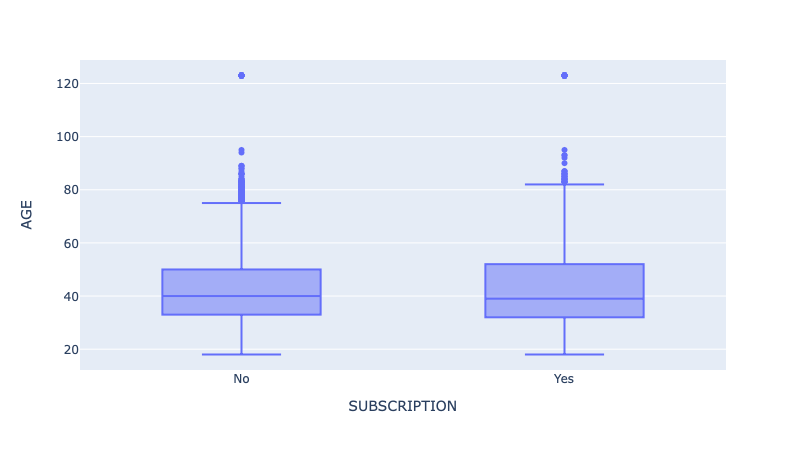

In [15]:

%matplotlib inline
fig = px.box(df, x="SUBSCRIPTION", y="AGE")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [49]:
test_age.shape[0]/45000

0.04013333333333333

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

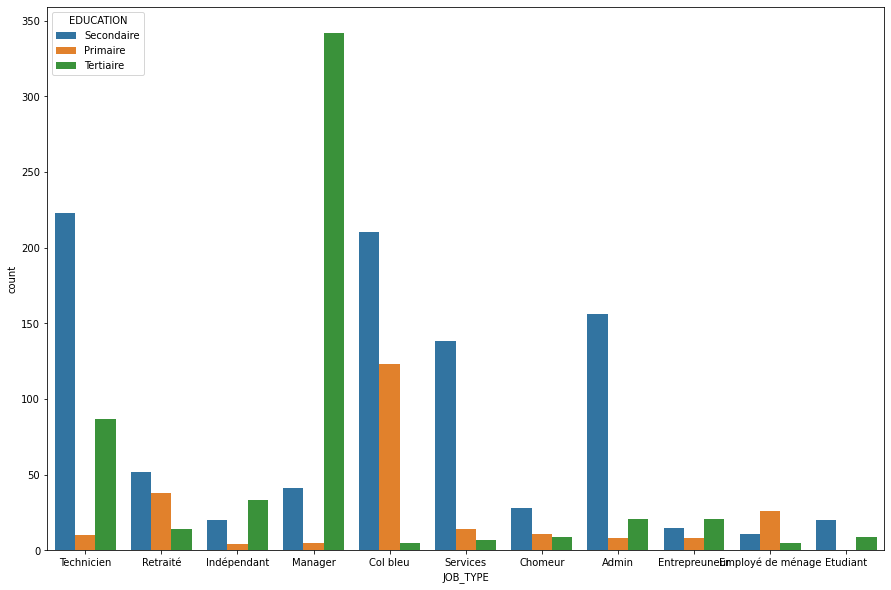

In [46]:
sns.countplot(x=test_age['JOB_TYPE'], hue=test_age['EDUCATION'])

In [44]:
test_age = df[df['AGE'] ==  123 ]
get_missing_percent(test_age)
test_age.shape
#check_missing_with_two_col(df,"EDUCATION", "AGE")

###
###
### Pourcentage de valeurs manquantes par colonnes 
###
###
###
RESULT_LAST_CAMPAIGN        82.890365
HAS_PERSO_LOAN              74.972315
STATUS                      62.458472
CONTACT                     29.291251
EDUCATION                    4.761905
JOB_TYPE                     0.719823
SUBSCRIPTION                 0.000000
NB_CONTACT_LAST_CAMPAIGN     0.000000
NB_DAY_LAST_CONTACT          0.000000
NB_CONTACT                   0.000000
DURATION_CONTACT             0.000000
HAS_HOUSING_LOAN             0.000000
BALANCE                      0.000000
HAS_DEFAULT                  0.000000
AGE                          0.000000
DATE                         0.000000
dtype: float64


(1806, 16)

In [17]:
check_missing_with_two_col(df,"JOB_TYPE", "EDUCATION")

JOB_TYPE Tertiaire :39
JOB_TYPE Secondaire :71
JOB_TYPE nan :0
JOB_TYPE Primaire :51
Col bleu             9726
Manager              9445
Technicien           7586
Admin                5161
Services             4148
Retraité             2252
Indépendant          1577
Entrepreuneur        1483
Chomeur              1301
Employé de ménage    1239
Etudiant              932
Name: JOB_TYPE, dtype: int64
Total missing : 286


In [18]:
check_missing_with_two_col(df,"EDUCATION", "JOB_TYPE")

EDUCATION Manager :241
EDUCATION Technicien :242
EDUCATION Entrepreuneur :76
EDUCATION Col bleu :454
EDUCATION nan :0
EDUCATION Retraité :119
EDUCATION Admin :171
EDUCATION Services :150
EDUCATION Indépendant :39
EDUCATION Chomeur :29
EDUCATION Employé de ménage :45
EDUCATION Etudiant :162
Secondaire    23165
Tertiaire     13272
Primaire       6846
Name: EDUCATION, dtype: int64
Total missing : 1853


In [19]:
rcParams['figure.figsize'] = 15,10


<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

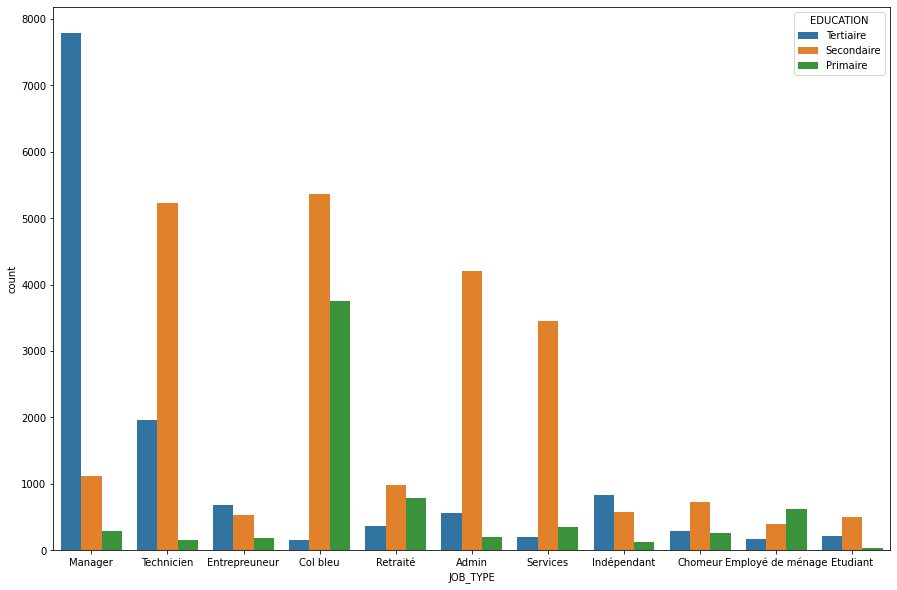

In [20]:
sns.countplot(x=df['JOB_TYPE'], hue=df['EDUCATION'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

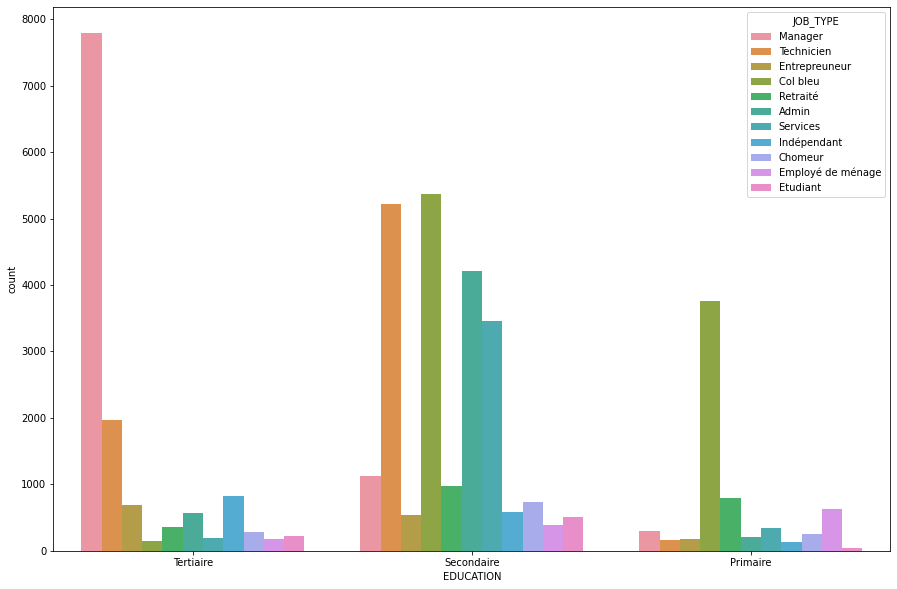

In [21]:
sns.countplot(x=df['EDUCATION'], hue=df['JOB_TYPE'])

In [22]:
df_without_missing = df.copy(deep=True)

In [23]:
df_without_missing["RESULT_LAST_CAMPAIGN"].value_counts()

Echec     4879
Autre     1832
Succes    1486
Name: RESULT_LAST_CAMPAIGN, dtype: int64

In [24]:
dict_loan = {'Yes':1, 'No':0}
df_without_missing.replace({'HAS_PERSO_LOAN' : dict_loan}, inplace = True)


In [25]:
df_without_missing['HAS_PERSO_LOAN'] = df_without_missing['HAS_PERSO_LOAN'].fillna(df_without_missing['HAS_PERSO_LOAN'].median())

In [33]:
df_without_missing['STATUS'] = df_without_missing['STATUS'].fillna('Marié')

In [36]:
df_without_missing['EDUCATION'] = df_without_missing['EDUCATION'].fillna('Secondaire')

<AxesSubplot:xlabel='HAS_PERSO_LOAN', ylabel='count'>

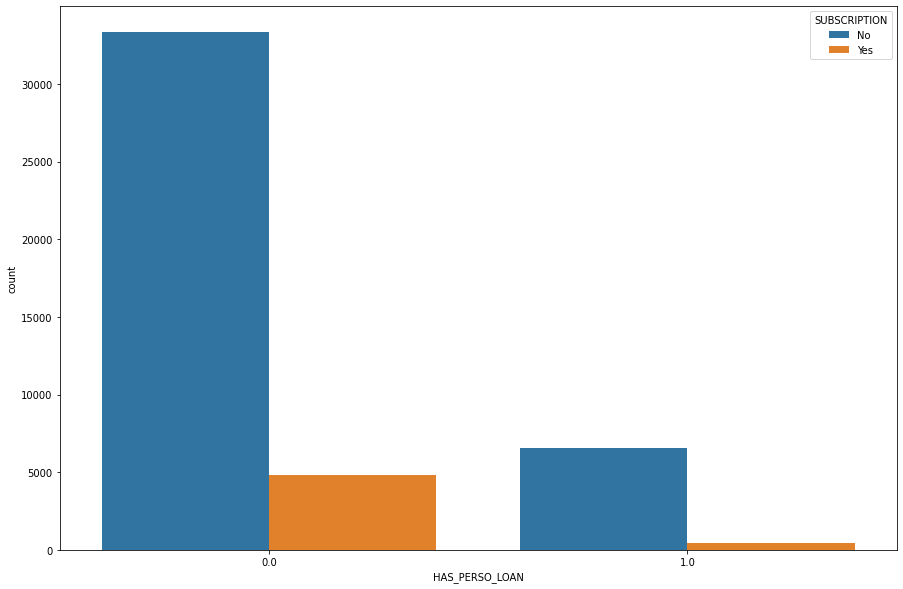

In [26]:
sns.countplot(x=df_without_missing['HAS_PERSO_LOAN'], hue=df_without_missing['SUBSCRIPTION'])

In [27]:
df_without_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      45136 non-null  object 
 1   AGE                       45136 non-null  int64  
 2   JOB_TYPE                  44850 non-null  object 
 3   STATUS                    44008 non-null  object 
 4   EDUCATION                 43283 non-null  object 
 5   HAS_DEFAULT               45136 non-null  object 
 6   BALANCE                   45136 non-null  int64  
 7   HAS_HOUSING_LOAN          45136 non-null  object 
 8   HAS_PERSO_LOAN            45136 non-null  float64
 9   CONTACT                   32117 non-null  object 
 10  DURATION_CONTACT          45136 non-null  int64  
 11  NB_CONTACT                45136 non-null  int64  
 12  NB_DAY_LAST_CONTACT       45136 non-null  int64  
 13  NB_CONTACT_LAST_CAMPAIGN  45136 non-null  int64  
 14  RESULT

In [31]:
df_without_missing.loc[df_without_missing["AGE"] > 50, "CONTACT"] = "Fixe"
df_without_missing['CONTACT'] = df_without_missing['CONTACT'].fillna('Portable')


df_without_missing.loc[df_without_missing["EDUCATION"] == "Tertiaire", "JOB_TYPE" ] = df_without_missing.loc[df_without_missing["EDUCATION"] == "Tertiaire", "JOB_TYPE" ].fillna("Manager")
df_without_missing.loc[df_without_missing["EDUCATION"] == "Secondaire", "JOB_TYPE" ] = df_without_missing.loc[df_without_missing["EDUCATION"] == "Secondaire", "JOB_TYPE" ].fillna("Admin")
df_without_missing.loc[df_without_missing["EDUCATION"] == "Secondaire", "JOB_TYPE" ] = df_without_missing.loc[df_without_missing["EDUCATION"] == "Secondaire", "JOB_TYPE" ].fillna("Services")
df_without_missing.loc[df_without_missing["EDUCATION"] == "Primaire", "JOB_TYPE" ] = df_without_missing.loc[df_without_missing["EDUCATION"] == "Primaire", "JOB_TYPE" ].fillna("Col bleu")
df_without_missing['JOB_TYPE'] = df_without_missing['JOB_TYPE'].fillna('Col bleu')


df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Technicien", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Technicien", "EDUCATION"].fillna("Secondaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Manager", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Manager", "EDUCATION"].fillna("Tertiaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Col bleu", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Col bleu", "EDUCATION"].fillna("Primaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Etudiant", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Etudiant", "EDUCATION"].fillna("Secondaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Admin", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Admin", "EDUCATION"].fillna("Secondaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Employé de ménage", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Employé de ménage", "EDUCATION"].fillna("Primaire")
df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Services", "EDUCATION"] = df_without_missing.loc[df_without_missing["JOB_TYPE"] == "Services", "EDUCATION"].fillna("Secondaire")


df_without_missing["RESULT_LAST_CAMPAIGN"] = df_without_missing["RESULT_LAST_CAMPAIGN"].fillna("Autre")

In [37]:
get_missing_percent(df_without_missing)

###
###
### Pourcentage de valeurs manquantes par colonnes 
###
###
###
SUBSCRIPTION                0.0
RESULT_LAST_CAMPAIGN        0.0
NB_CONTACT_LAST_CAMPAIGN    0.0
NB_DAY_LAST_CONTACT         0.0
NB_CONTACT                  0.0
DURATION_CONTACT            0.0
CONTACT                     0.0
HAS_PERSO_LOAN              0.0
HAS_HOUSING_LOAN            0.0
BALANCE                     0.0
HAS_DEFAULT                 0.0
EDUCATION                   0.0
STATUS                      0.0
JOB_TYPE                    0.0
AGE                         0.0
DATE                        0.0
dtype: float64


<AxesSubplot:>

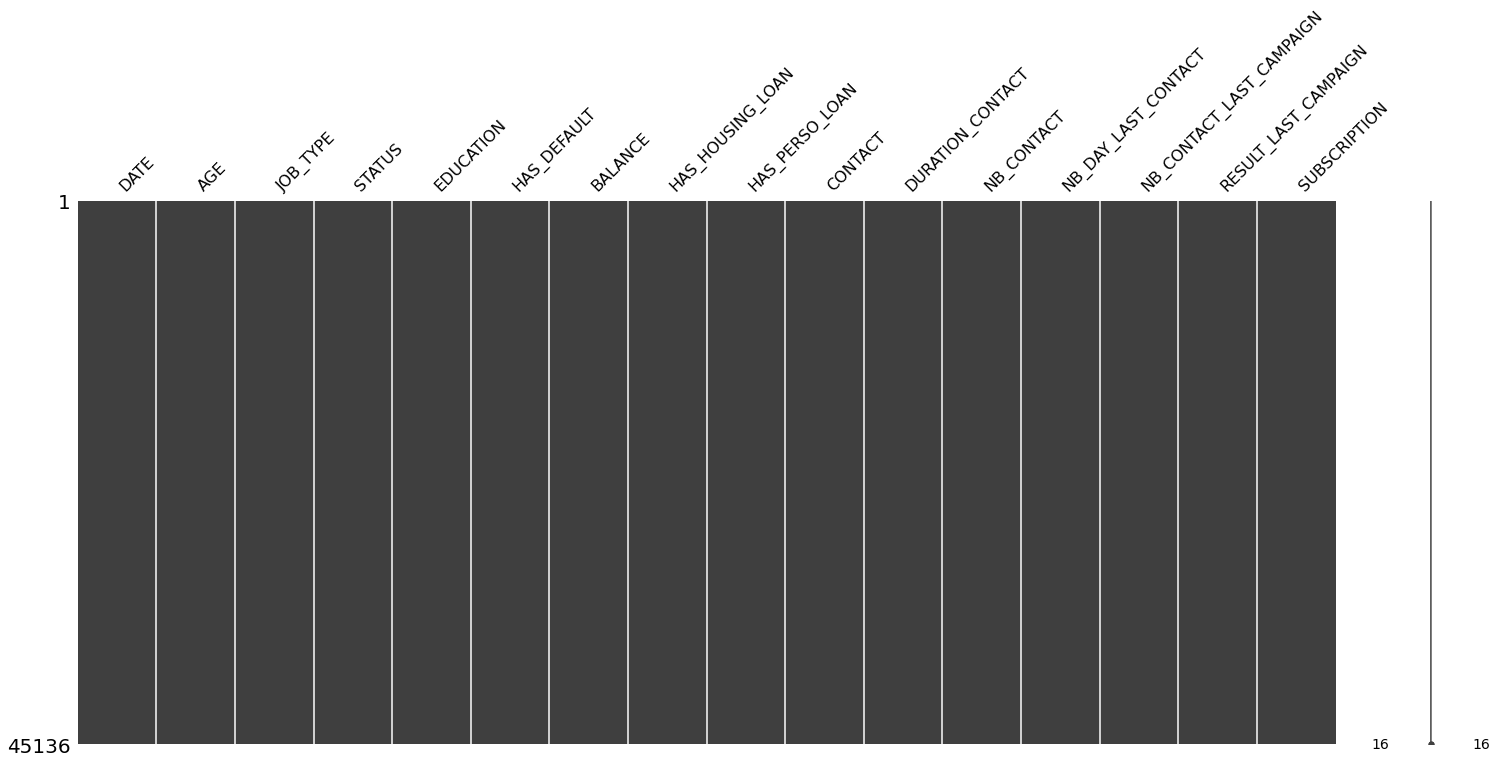

In [38]:
msno.matrix(df_without_missing)


In [43]:
df_without_missing.to_csv('data/data_v2.csv', index=False)